# Diagnosing and Predicting Coronary Artery Disease
### By: Kareena Kak

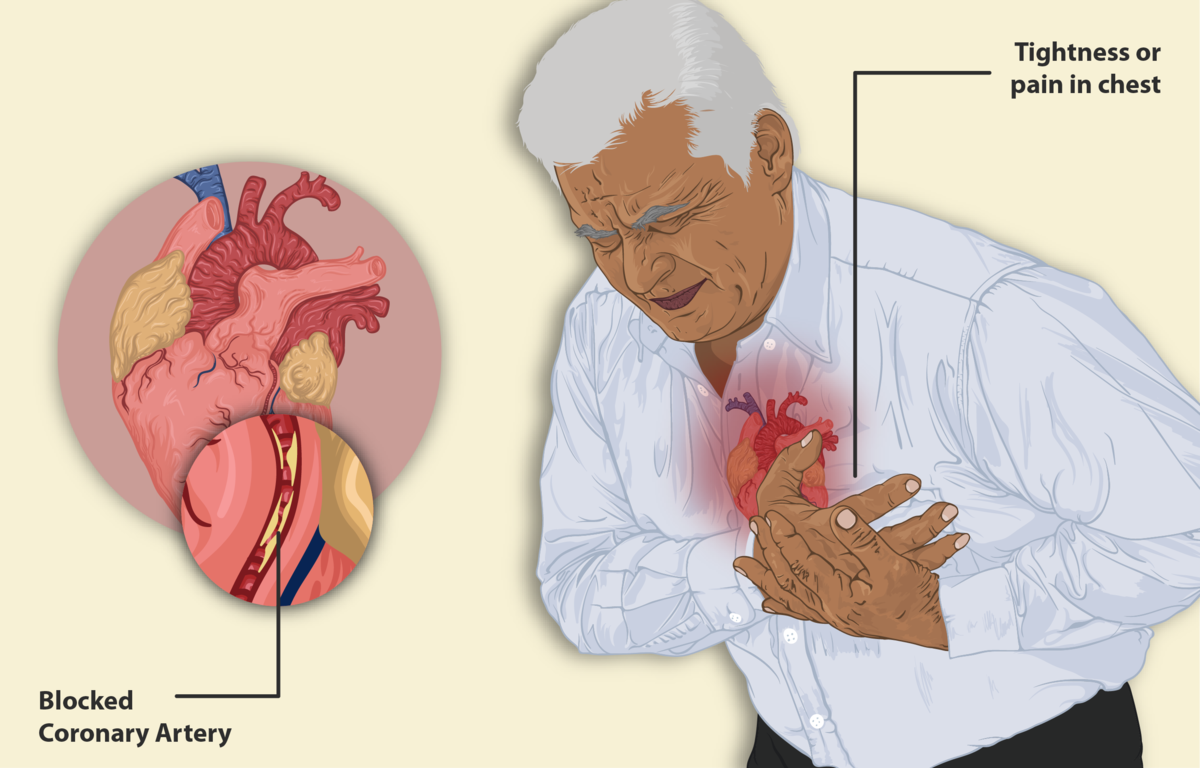

## Introduction: 

The coronary arteries are responsible for supplying the heart with sufficient blood, oxygen, and nutrients (Mayo Clinic, 2022). These arteries wrap around the heart to facilitate proper heart contraction and blood circulation (Sachdev, 2023).

Coronary Artery Disease (CAD) is a heart condition which occurs when the movement of blood through the coronary arteries gets restricted by the buildup of plaque on the inner walls of the coronary arteries. Plaque is a collection of different substances found in the blood including cholesterol, fat, and calcium (Shahjehan & Bhutta, 2023). This blood flow obstruction can lead to angina, heart attacks, more complex cardiovascular diseases, reduced life expectancy, and sudden death (Sachdev, 2023). For these reasons, CAD is one of the leading causes of deaths worldwide and contributes to many of the cardiovascular diseases seen today (Mayo Clinic, 2022). Given the serious implications of CAD and it's impact on quality of life, proactive measures (including early diagnosis, personalized treatment plans and mitigation strategies) are crucial to curtailing the progression of this disease. 

This CAD data analysis proposal outlines an approach to leverage data analysis techniques to develop an efficient predictive model to classify individuals based on whether they have CAD (or at risk of developing CAD) or not. 

#### <center>What is the likelihood of a patient having Coronary Artery Disease based on the number of major vessels, existing thalassemia health conditions, maximum heart rate, and exercise-induced angina?</center>

## Methods    

The original data from Janosi et al. (1988) is a grouped dataset which contains observations from four different regions (Cleveland, Hungary, Switzerland, and California).

To develop a well-rounded and more accurate data interpretation/classifier, the four different regions will be combined into one dataframe. 

There will be 8 major steps in this data analysis: 

1. <u>*Reading the dataset*</u>:  
Read the four separate dataframes into R

2. <u>*Data merging and initial cleaning*</u>:  
Merge the four dataframes and create column headers. 

3. <u>*Data wrangling to create tidy data*</u>:  
Transform the merged dataset according to tinydata conditions and conventional formatting.

4. <u>*Predictor variables selection*</u>:  
Create a correlation plot to identify the 4 most num-predictor variable relationships.
These 4 will be the main focus in our classifier.  

6. <u>*Splitting into Training and Test Set*</u>:  
To wrangle and train the model then test it's performance independently. 

7. <u>*K-Nearest Neighbors classification*</u>:  
Set up knn classifier using cross-validation to find the optimal K value (# of nearest neighbors), then set up a workflow to start the model training process.

8. <u>*Effectiveness of the model*</u>:  
Using the testing set to evaluate the k-nn classifier performance. 

9. <u>*Analysis of the results*</u>



## Preliminary exploratory data analysis

### Loading libraries

In [6]:
# install.packages("ggcorrplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [79]:
library(tidyverse)    # allows data manipulation and visualization 
library(tidymodels)    # allows modelling and statistical analysis 
library(repr)    # string and binary representations of objects 
library(dplyr)    # data wrangling and manipulation 
library(ggplot2)    # creates complex graphics
library(purrr)    # tools for functional programming and iterating functions 
library(stringr)    # string manipulation functions 
library(RColorBrewer)    # provides color schemes for graphics among other uses  
options(repr.matrix.max.rows = 6)    # limits output of dataframes to 6 rows
library(ggcorrplot)    # imports the function to create the correlation plot 

### Reading and Wrangling our dataset into Tidydata

**Due to there being 4 separate datasets in this dataframe, I will:**
1. Read each of the datasets separately using `read_csv()`, 
2. Set `header = FALSE` since original dataframe does not include column headers 
3. Iterate a function to substitute each `"?"` value with an `NA` value for increased dataset functionality  

**Once the individual datasets are compatible with tidyverse, I futher clean them up and prepare them for future data wrangling steps, by:**
1. Merge all 4 datasets into one dataset called "heart_data" using `bind_rows`
2. Replacing the automatically determined column headers (X1 - X14) with the appropriate column names listed by Janosi et al. (1988) using `setNames`
3. Change columns from character to numeric values for data wrangling using `mutate_all` with the `as.numeric()` argument. 
4. To simplify this analysis, an `ifelse` statement is used to turn `num` into a binary categorical variable 
5. `num` response variable is converted into a factor variable using `as_factor()`. 

In [80]:
# read each of the 4 datasets 
# transform the merged dataset according to tinydata conditions  

data1 <- read.csv("data/heart_disease/processed.cleveland.data", header = FALSE) |>     # setting header to false since the dataset does not specify any in the original 4 datasets 
    map_df(function(x) gsub("?", NA, x, fixed = TRUE))     # replacing "?" values with "NA" values so the data can be manipulated and wrangled easily in R  
           
data2 <- read.csv("data/heart_disease/processed.hungarian.data", header = FALSE) |> 
    map_df(function(x) gsub("?",NA,x, fixed = TRUE))
           
data3 <- read.csv("data/heart_disease/processed.switzerland.data", header = FALSE) |> 
    map_df(function(x) gsub("?",NA,x, fixed = TRUE))
           
data4 <- read.csv("data/heart_disease/processed.va.data", header = FALSE) |> 
    map_df(function(x) gsub("?",NA,x, fixed = TRUE))

#There are a total of 14 columns in this dataset (Janosi et al., 1988): 
#    1. age: age (years) 
#    2. sex: sex (0 = female, 1 = male)
#    3. cp: chest pain type (4 types)
#    4. trestbps: resting blood pressure (mmHg)
#    5. chol: serum cholestrol levels (mg/dl)
#    6. fbs: fasting blood pressure (> or < 120mg/dl)
#    7. restecg: resting electrocardiographic results
#    8. thalach: maximum heart rate achieved
#    9. exang: exercise-induced angina (0 = false, 1 = true)
#    10. oldpeak: ST depression induced by exercise relative to rest
#    11. slope: slope of peak exercise ST segment (1 = uplope, 2 = flat, 3 = downslope)
#    12. ca: number of major vessels (0-3) colored by fluoroscopy)
#    13. thal: thalassemia health condition level (3 = normal, 6 = fixed defect, 7 = reversable defect)
#    14. num: diagnosis of the heart disease

# merge datasets into single dataset and change column header names to match the above list
heart_data <- 
    bind_rows(data1, data2, data3, data4) |>     # merging the 4 datasets 
    setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs",     # setting the column names once all of the data has been compiled into one large dataset 
               "restecg", "thalach", "exang", "oldpeak", "slope", "ca",
               "thal", "num")) |>
    mutate_all(as.numeric) |>     # changing the column value format from a character/vector to a numeric value 
    mutate(num = ifelse(num > 0, "presence", "no presence") |> as.factor())     #turning “num” into a binomial classifier to simplify data analysis and prediction instead of levels (where 0 = no CAD, 1-4 = levels of disease).    

heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,no presence
67,1,4,160,286,0,2,108,1,1.5,2,3,3,presence
67,1,4,120,229,0,2,129,1,2.6,2,2,7,presence
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,presence
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,no presence
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,presence


***Table 1: The entire tidy `heart_data` set***

### Splitting the data into a training and testing set 

There are a total of 920 observations in the `heart_data` tidy dataset (including rows with NA values reported). 

**I split the `heart_data` into 2 parts:**
1. 75% to the `heart_train` training set used to build the classifier and create visualizations. 
2. 25% to the `heart_test` testing set used to test the classifier's performance  

To avoid bias and human tampering, `initial_split()` is used to shuffle, stratify, and randomly select these two subsets from the original dataset. To make this split reproduceable, I use `set.seed()` with the integer argument `9999` consistently throughout this code. 

In [81]:
set.seed(9999) # to ensure this split and all further data manipulation is reproduceable 

# A large amount of data is needed for training to allow a broad spectrum of observations to diversify and ameliorate the prediction accuracy of the model 

# splitting the dataframe into a training_set (0.75) and a testing_set (0.25) 
heart_split <- initial_split(heart_data, prop = 0.75, strata = num) 
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

# the glimpse function allows me to view data with a large number of columns easily (columns are printed vertically down the page instead of across)
glimpse(heart_train)
glimpse(heart_test) 

Rows: 689
Columns: 14
$ age      <dbl> 63, 37, 41, 57, 56, 44, 52, 54, 48, 64, 58, 58, 43, 69, 59, 4…
$ sex      <dbl> 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0…
$ cp       <dbl> 1, 3, 2, 4, 2, 2, 3, 4, 3, 1, 1, 3, 4, 1, 4, 3, 4, 1, 2, 3, 3…
$ trestbps <dbl> 145, 130, 130, 120, 140, 120, 172, 140, 130, 110, 150, 120, 1…
$ chol     <dbl> 233, 250, 204, 354, 294, 263, 199, 239, 275, 211, 283, 340, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1…
$ restecg  <dbl> 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <dbl> 150, 187, 172, 163, 153, 173, 162, 160, 139, 144, 162, 172, 1…
$ exang    <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.6, 1.3, 0.0, 0.5, 1.2, 0.2, 1.8, 1.0, 0.0, 1…
$ slope    <dbl> 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1…
$ ca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1…
$ thal     <dbl> 6

### Correlation Plot

To reduce model complexity, avoid overfitting, and maximize classifier performance, it is best to choose a maximum of 4 key predictor variables. 

While there are many underlying causes and symptoms of CAD (Mayo Clinic, 2022), I need to figure out which of the 13 variables available in this dataset have the biggest influence on CAD in order to enhance the efficiency of my KNN predictions. 

To do this, I use `ggcorrplot` - a tool which detects hidden patterns between variables. From this correlation matrix, I can confidently choose the best predictor variables for `num` as characterized by their high correlation value (+ or -). 

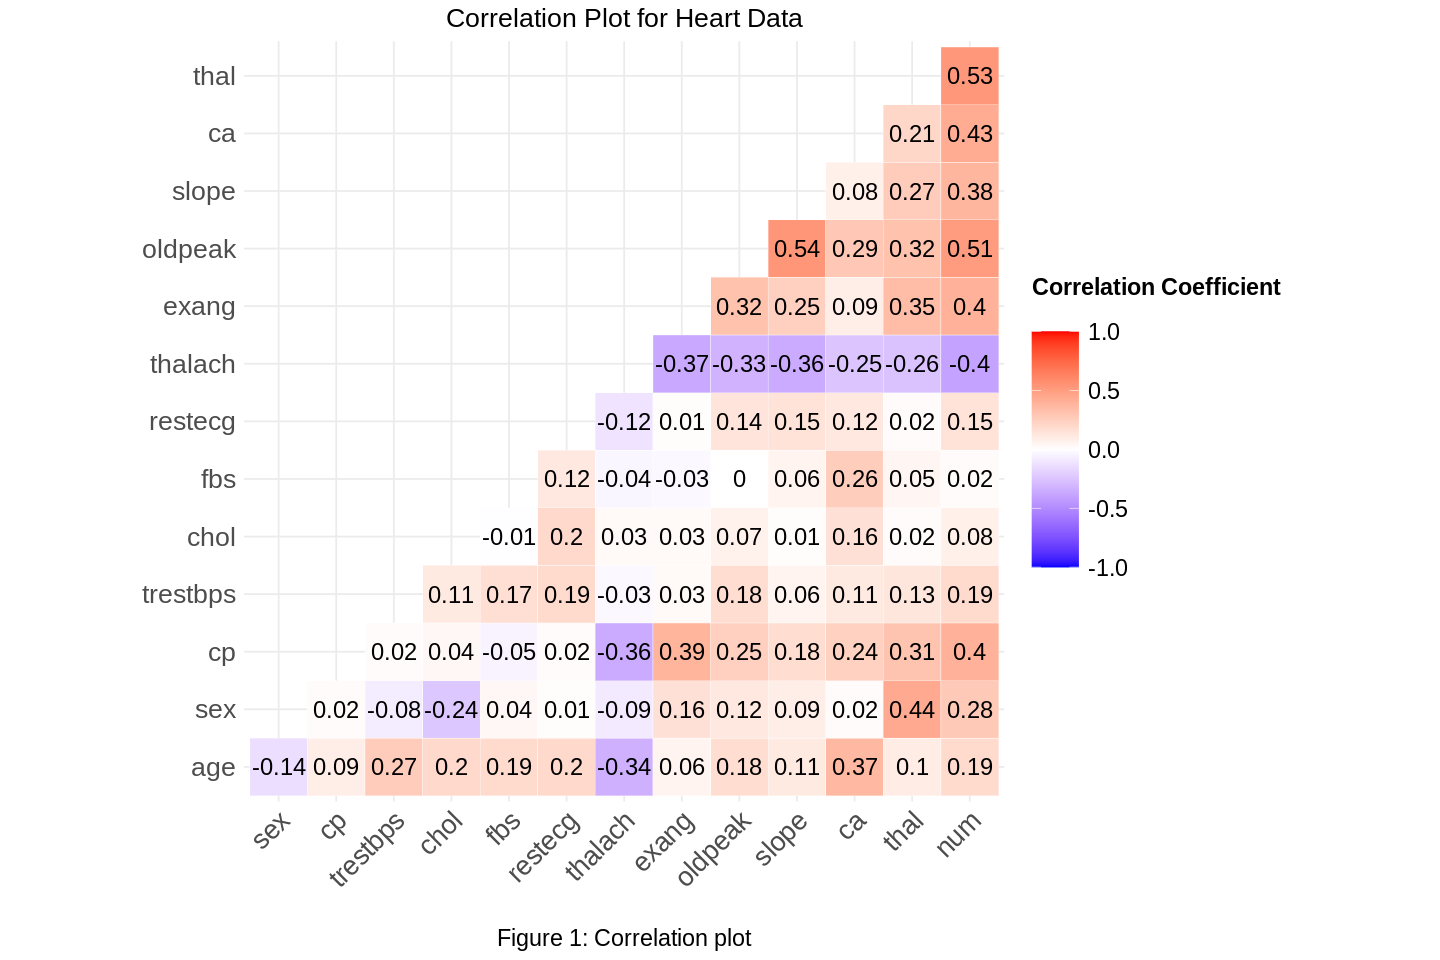

In [82]:
options(repr.plot.width = 12, repr.plot.height = 8)

# The R package corrplot is a tool which can help detect hidden patterns among variables 

corr_plot <- 
    heart_train |>

    # ensuring the data is suitable for modelling (pre-processing step)
    mutate(num = ifelse(num == "presence", TRUE, FALSE) |> as.numeric()) |>     
    cor(use="complete.obs") |>     # skips NA value rows

    # formatting the correlation plot 
    ggcorrplot(outline.col = "white", 
               type = "lower",
               lab = TRUE,
               lab_size = 5,
               tl.cex = 16,
               legend.title = "Correlation Coefficient\n") +

    # setting the title and caption for increased user understanding 
    labs(title = "Correlation Plot for Heart Data",
         caption = "\nFigure 1: Correlation plot") +

    # formatting the correlation plot to increase user readability (using text and object size in this plot) 
    theme(legend.title = element_text(size = 14, face = "bold"), 
          legend.text = element_text(size = 14),
          legend.key.size = unit(1, "cm"),
          plot.title = element_text(size = 16, hjust = 0.5),
          plot.caption = element_text(size = 14, hjust = 0.5))

corr_plot 

# Note, based on Figure 1 (more specifically the most right hand column of correlation values) I have picked the following predictor variables for my data analysis: 
#     1. **thal** : thalassemia health condition level (3 = normal, 6 = fixed defect, 7 = reversable defect)
#     2. **ca** : number of major vessels (0-3) colored by fluoroscopy)
#     3. **exang** : exercise-induced angina (0 = false, 1 = true)
#     4. **thalach** : maximum heart rate achieved

### Exploratory data analysis

Before creating the visualizations, I need to summarize and understand the data. 

In [83]:
# How many obervations belong to patients with Coronary Artery Disease versus patients who do not have Coronary Artery Disease (the number of observations in each class)

data_per_class <- heart_train |> 
    group_by(num) |>     # separate the number of observations by grouping CAD presence vs. no presence 
    summarize(n = n()) 

data_per_class 

num,n
<fct>,<int>
no presence,308
presence,381


***Table 2: Number of observations for patients without and with CAD***

Using the training data, I group the data by `num` and count the number of observations for each class using `summarize` and `n()`. The resulting Table 2 shows almost 50-50 split of observations in each class, with slightly more cases of CAD patients.

In [86]:
# the max, mins, and means of the predictor variables used in this analysis

heart_summary_per_desired_column <- heart_train |> 
    group_by(num) |>     # separate the number of observations by grouping CAD presence vs. no presence
    summarize(max_thalach = max(thalach, na.rm = TRUE),    # summary statistics (max, min, and mean), *note, I remove NA values which would otherwise complicate calculations
              min_thalach = min(thalach, na.rm = TRUE), 
              mean_thalach = mean(thalach, na.rm = TRUE), 
              max_exang = max(thalach, na.rm = TRUE),
              min_exang = min(thalach, na.rm = TRUE),
              mean_exang = mean(thalach, na.rm = TRUE),
              max_ca = max(ca, na.rm = TRUE), 
              min_ca = min(ca, na.rm = TRUE), 
              mean_ca = mean(ca, na.rm = TRUE), 
              max_thal = max(thal, na.rm = TRUE), 
              min_thal = min(thal, na.rm = TRUE), 
              mean_thal = mean(thal, na.rm = TRUE)) 

heart_summary_per_desired_column

num,max_thalach,min_thalach,mean_thalach,max_exang,min_exang,mean_exang,max_ca,min_ca,mean_ca,max_thal,min_thal,mean_thal
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no presence,194,69,149.0377,194,69,149.0377,3,0,0.2809917,7,3,4.066667
presence,195,60,128.8230,195,60,128.8230,3,0,1.0769231,7,3,5.977901


***Table 3: Maximum, minimum, and mean statistics for each of the 4 chosen predictor variables***

Table 3 provides summary statistics on the 4 key predictor variables from the `heart_train` dataset to discern the differences between patients with and without CAD. The data was grouped by CAD presence using `group_by()` then summarized to calculate the maximum, minimum, and mean for each variable. 

Although the maximum and minimum values are similar, the mean values highlight notable disparities which help indicate where the majority of datapoints are clustered. 

In [87]:
# number of rows without missing data (no NA values) 
num_rows_without_na <- nrow(na.omit(heart_train)) 

# number of rows with missing data (NA values) 
num_rows_with_na <- nrow(heart_train) - num_rows_without_na

#summary table 
na_summary <- tibble(
    "Number of rows without NA values" = num_rows_without_na,
    "Number of rows with NA values" = num_rows_with_na) 

na_summary

Number of rows without NA values,Number of rows with NA values
<int>,<int>
220,469


***Table 4: Number of rows with and without NA values***

Table 4 displays the number of rows with and without NA values in the `heart_train` dataset. This information is essential to make informed pre-processing decisions to ensure the classifier's robustness, accurate distance calculations, and valuable visualizations necessary for accurate KNN modeling. 

In [88]:
heart_proportions_key_predictors <- heart_train |>
                    group_by(num) |>    # separate the number of observations by grouping CAD presence vs. no presence
                    summarize(mean_thalach = mean(thalach, na.rm = TRUE),   # summary statistics (max, min, and mean), *note, I remove NA values which would otherwise complicate calculations
                              mean_exang = mean(exang, na.rm = TRUE),
                              mean_ca = mean(ca, na.rm = TRUE), 
                              mean_thal = mean(thal, na.rm = TRUE),
                              n_of_patients = n())

heart_proportions_key_predictors

num,mean_thalach,mean_exang,mean_ca,mean_thal,n_of_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
no presence,149.0377,0.1369863,0.2809917,4.066667,308
presence,128.8230,0.6095506,1.0769231,5.977901,381


***Table 5: Compiled summary statistics exclusively for the 4 key predictors***

Table 5 is a compilation of Table 2 and Table 3 focusing on only the mean values. 

### Useful visualizations that compare the distributions of chosen predictor variables 

#### (1) Maximum heart rate achieved : thalach histogram plot (numerical predictor variable)

Warning message:
“Removed 41 rows containing non-finite outside the scale range (`stat_bin()`).”


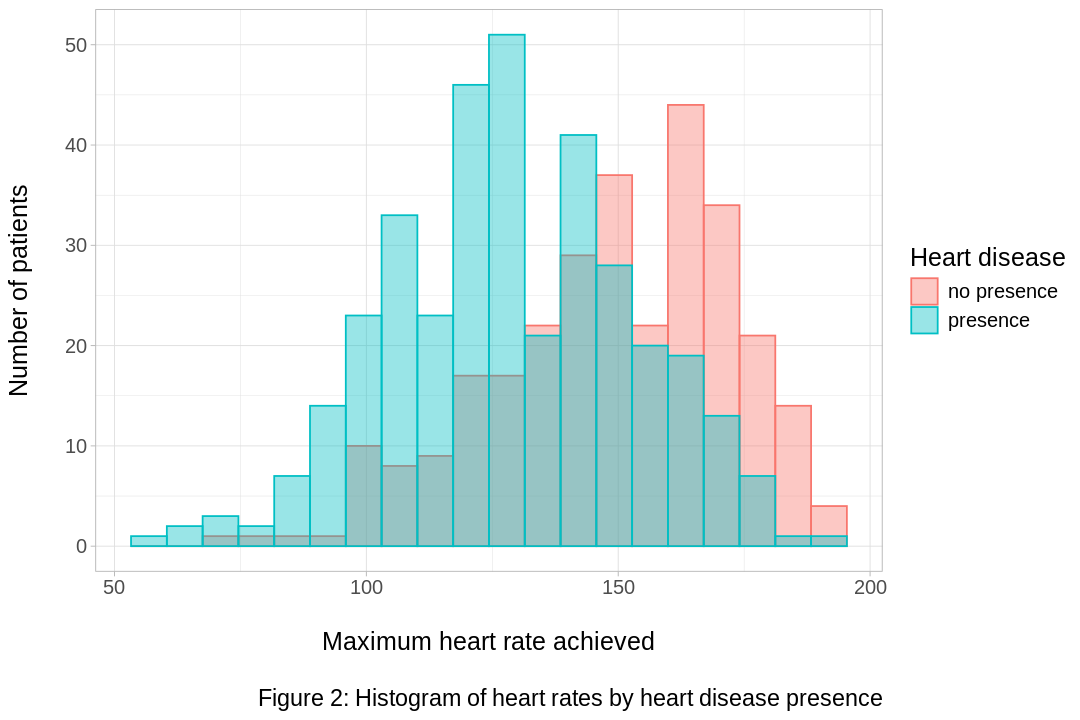

In [89]:
options(repr.plot.width = 9, repr.plot.height = 6)

thalach_histogram <- heart_train |> 
    # setting up the historgam axis and layout 
    ggplot(aes(x = thalach, fill = num, colour = num)) +     
    # histogram bar formatting 
    geom_histogram(alpha = 0.4, position = "identity", bins = 20) +    
    # increasing user readability by including titles, a legend, and a caption 
    labs(x = "\nMaximum heart rate achieved", y = "Number of patients\n", fill = "Heart disease", colour = "Heart disease", 
        caption = "\nFigure 2: Histogram of heart rates by heart disease presence") +
    # visual formatting to allow the bars to be the main focus of the plot - increases readibility and understanding
    theme_light() +       
    theme(text = element_text(size = 15), 
          plot.caption = element_text(size = 14))

thalach_histogram
          

The `thalach` numerical variable is effectively visualized using `geom_histogram` in `ggplot2`, with `color = num` helping to distinguish between   between unaffected and CAD-affected patients. 

Figure 2 reveals significant differences in maximum heat rates, with healthy patients averaging ~160bpm and CAD-patients averaging ~120 bpm. This disparity is indicative of how plaque buildup in the coronary arteries limits blood flow and heart rate when under stress; an important physiological marker for the KNN classifier. 

### (2) How categorical predictor variables are distributed : exang, ca, and thal

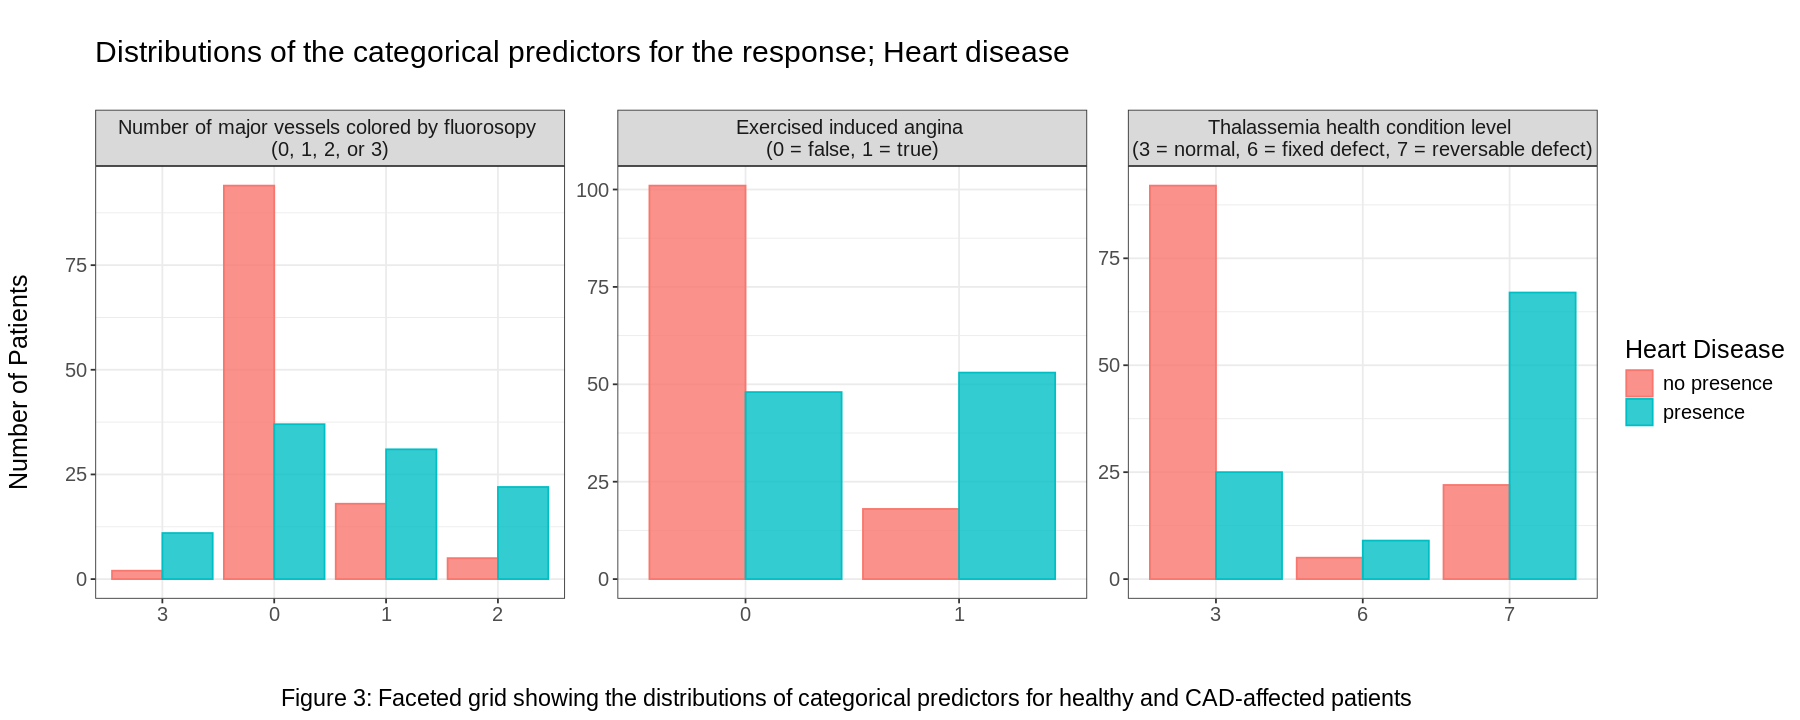

In [92]:
# setting the plot dimensions to ensure the plot is appropriately sized for easy viewing and better visibility 
options(repr.plot.width = 15, repr.plot.height = 6)

pivot_data <- heart_train |>
    na.omit() |>     # ommitting NA values to simplify the graph 
    select(num, thal, exang, ca) |>    # selecting the response and predictor variables 
    map_df(as.factor) |>    # turn all of these categorical variables from dbl to factor columns 
    pivot_longer(cols = thal:ca,       # makes the dataset more concise and easier to model with 
                 names_to = "predictors",
                 values_to = "values")

# formatting and setting the labels for the faceted-plot 
labels <- c(thal = "Thalassemia health condition level \n(3 = normal, 6 = fixed defect, 7 = reversable defect)",
            exang = "Exercised induced angina \n(0 = false, 1 = true)",
            ca = "Number of major vessels colored by fluorosopy \n(0, 1, 2, or 3)")      

# creating the faceted bar plot 
facet_categorical_plots <- pivot_data |>    
    ggplot(aes(x = values, fill = num, colour = num)) +
    geom_bar(position = "dodge", stat = "count", alpha = 0.8) +
    # label, legend, and axis formatting to increase user readabilty and understanding 
    labs(x = "",           
         y = "Number of Patients\n",
         fill = "Heart Disease",
         colour = "Heart Disease",
         title = "\nDistributions of the categorical predictors for the response; Heart disease\n", 
         caption = "\nFigure 3: Faceted grid showing the distributions of categorical predictors for healthy and CAD-affected patients") +
    # setting up the facets by dividing the plot according to the three categorical predictor variables 
    facet_wrap(vars(predictors), 
               scales = "free",
               labeller = labeller(predictors = labels)) +
    # visual formatting to allow the bars to be the main focus of the plot - increases readibility and understanding
    theme_bw() +     
    # formatting the labels (title, text, and caption) to increase user readability and understanding 
    theme(plot.caption = element_text(size = 14, hjust = 0.5),  
          text = element_text(size = 15)) 

facet_categorical_plots
            

The faceted bar graph for `ca`, `exang`, and `thal` from the `heart_train` dataset illustrates their proportions in relation to CAD presence. 

1. Major vessels detected (`ca`): Patients without CAD typically show 0 or 1 detectable vessels, whereas patients with CAD can have 0 to 3 vessels detected via imaging. This pattern suggests that CAD-patients have more detectable blockages visible during imaging tests due to inflammation and plaque buildup.

2. Exercise-induced angina (`exang`): most unnaffected patients do not experience angina, whereas about half of CAD patients do - this shows how narrowed coronary artieries restrict blood flow and lead to exercise-induced discomfort.  

3. Thalassemia health condition (`thal`): most unnaffected patients exhibit a normal thalassemia level (3), while CAD patients predominantly experience reversable thalassemia defects (7). This pattern indicated compromised heart performance under stress. 

### Pre-processing steps 

#### Creating the model 

To develop the KNN classifier for predicting CAD (`num`), there are 5 steps: 
1. Omit rows containing NA values using `na.omit` to ensure KNN algorithm functionality  
2. Define a recipe using `heart_train` to predict `num` using scaled and centered predictor variables
3. Define a specification which uses K-nearest neighbors, with `neighbors = tune()` to choose the best K-value
4. Implement 5 fold cross-validation using `vfold_cv` and stratifying by `num` to ensure each fold is representative of the overall dataset 
5. Add the recipe and model specs to a `workflow()` and apply `tune_grid` to estimate prediction accuracy for a range of K values.
These metrics are collected using the `collect_metrics()` function. 

In [91]:
# setting a random seed for reproduceability 
set.seed(9999)

# omitting any NA values to avoid adverse impacts on KNN calculations and results 
heart_train <- na.omit(heart_train)

# Preparing the recipe for data processing 
heart_recipe <- recipe(num ~ thalach + thal + exang + ca, data = heart_train) |>  # specify the 4 predictor variables to classify the num response variable 
    # scale and center all numeric predictors to normalize the data spread and improve the KNN classifier performance 
    step_scale(all_numeric_predictors()) |>
    step_center(all_numeric_predictors())

# define the KNN model specifications 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>  # use rectangular weight for uniforms weighting of the datapoints and set neighbors to tune() to find the most optimal K value 
    # setting the engine and mode according to the type of question we are answering - classification/predictive question using K-nearest neighbors algorithm 
    set_engine("kknn") |>
    set_mode("classification")

# set up a 5-fold cross-validation which is stratified by the response variable "num" 
df_vfold <- vfold_cv(heart_train, v = 5, strata = num) 

# create a grid of neighbor values ranging from 1 to 100 for tuning to find the most optimal K value for this model 
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

# setting up the workflow 
df_results <- workflow() |> 
    # adding in the pre-processing recipe and the model specifications 
    add_recipe(heart_recipe) |> 
    add_model(knn_spec) |> 
    #execute the tuning grid on the 5 cross-validation folds 
    tune_grid(resamples = df_vfold, grid = gridvals) |>
    # collecting and filtering the metrics for accuracy to choose the best K value for this CAD case-study 
    collect_metrics() |>
    filter(.metric == "accuracy") |> 
    # I only want the neighbors and mean column for future visualization purposes 
    select(neighbors, mean) |> 
    # right off the bat, I want to be able to see the best K-neighbor accuracy values
    arrange(desc(mean))

#display the top 6 best K-neighbor accuracy values from the tuning processm
head(df_results)

neighbors,mean
<dbl>,<dbl>
52,0.8269368
51,0.8224924
11,0.8223867
12,0.8223867
54,0.8223867
35,0.8180432


***Table 6: A tibble containing the mean prediction accuracy of 1 to 100 K nearest neighbors in descending order.***

I am plotting Table 6 to get a sense of how safe and stable each K-neighbors choice is (by the spikes and drops in accuracy), 

Warning message in geom_point(aes(x = 52, y = 0.8269368), size = 2, colour = "blue"):
“All aesthetics have length 1, but the data has 100 rows.
ℹ Did you mean to use `annotate()`?”


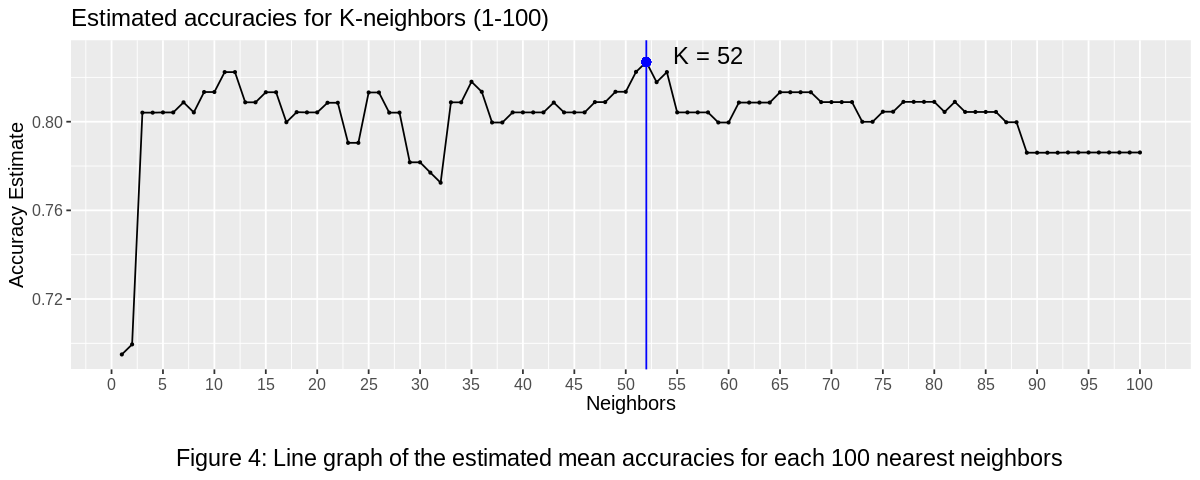

In [93]:
# plotting accuracy versus K 

# setting the plot dimensions to ensure the plot is appropriately sized for easy viewing and better visibility 
options(repr.plot.width = 10, repr.plot.height = 4)

# creating a ggplot object to visualize the relationship between number of neighbors (ranging from 1 to 100) and their corresponding accuracy
accuracy_vs_k <- ggplot(df_results, aes(x = neighbors, y = mean)) +
    # plotting the individual points for accuracy estimates at each K value to increase user readability and understanding 
    geom_point(size = 0.5) +   # these points should be set to a smaller size to avoid their dominance over the actual trend we want to highlight 
    # connecting the geom_points with a geom_line for better trend visualization 
    geom_line() +
    # including a vertical line at the K value with the highest corresponding accuracy value to highlight this area and build confidence in out K-neighbors choice 
    geom_vline(xintercept = 52, color = "blue") + 

    # formatting the title, caption, and text to increase user readability  
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Estimated accuracies for K-neighbors (1-100)", 
         caption = "\nFigure 4: Line graph of the estimated mean accuracies for each 100 nearest neighbors") +

    # to make it very clear, I am annotating the plot with text to indicate the the optimal K value 
    annotate("text", x = 58, y = 0.83, label = paste("K = 52"), cex = 5) +
    # highlighting the specific datapoint at K = 52 with a larger blue point to allow users to focus on this spot on the graph 
    geom_point(aes(x = 52, y= 0.8269368), size = 2, colour = "blue") +
    # setting the x-axis breaks to occur every 5 units from K = 1 to K = 100 for clarity and increased readability 
    scale_x_continuous(breaks = seq(0, 100, by = 5)) + 
    # setting the overall text size for the plot elements and adjusting the plot caption format 
    theme(text = element_text(size = 12), 
          plot.caption = element_text(size = 14, hjust = 0.45)) 

accuracy_vs_k

Figure 4 indicates that K = 52 is the optimal K-neighbor to maximize prediction accuracy.
The accuracy drops on either side of this datapoint are shallow, stable, and still have an accuracy >80%. 

In [94]:
# Although we know that my models prediction accuracy is very high, I still need to compare this to the majority classifier. 

# Find the percentage of CAD and non-CAD classes in heart_train 
heart_proportions <- heart_train |>
                    group_by(num) |>    # grouping the dataset according to the 2 class groups (presence or no presence of CAD) 
                    summarize(n = n()) |> 
                    mutate(percent = 100*n/nrow(heart_train))   # turning the rate into a percentage for easier understanding 
heart_proportions

# These percentages indicate that our class (num) proportions are roughly preserved when splitting the data as well as give us information on the dataset's majority classiffier

num,n,percent
<fct>,<int>,<dbl>
no presence,119,54.09091
presence,101,45.90909


***Table 7: Accuracy of the majority classifier***

Table 7 (majority classifier information) was generated using `group_by` and `summarize` to obtain the most common outcomes in each `num` category, and reveals that the "no presence" diagnosis constitutes 54.09% of the training data. This information demonstrates that my classifier is more effecive and surpasses the accuracy of the majority classifier. 

### Building and testing our KNN classifier

Now that I have determined K = 52, I can create the best specification by setting `neighbors = 52` then fit to the `heart_train` dataset. 

In [95]:
# setting a random seed for reproduceability 
set.seed(9999)

# removing rows with NA values from the test dataset to ensure clean data for testing
heart_test <- na.omit(heart_test)

# defining the best KNN model specification using the optimal number of neighbors determined (K = 52) 
best_spec <- nearest_neighbor(weight_func= "rectangular", neighbors = 52) |> 
    set_engine("kknn") |>    # setting the engine to 'kknn' for the K-nearest neighbors algorithm
    set_mode("classification")    # setting the mode to classification for a categorical outcome (num) 

# setting up the workflow for K = 52 
best_fit <- workflow() |> 
    add_recipe(heart_recipe) |>    # adding the pre-processed recipe defined earlier 
    add_model(best_spec) |>     # adding the model specification from above
    fit(data = heart_train)   # fitting the model to the training data 

Now that the baseline is set up, the estimated accuracy of the KNN classifier can be evaluated on `heart_test` using the `predict` function. From these predictions, accuracy, precision, recall, and a confusion matrix are calculated. 

In [96]:
# generating predictions for the test set using the fitted KNN model from the code cell above
heart_test_predictions <- predict(best_fit, heart_test) |> 
    # binding the predictions made to the test dataset for comparison and performance evaluation 
    bind_cols(heart_test)  

# extracting the order of the true labels from the test predictions - this will be useful for validating model's prediction against actual outcomes (precision and recall)  
heart_test_levels <- heart_test_predictions |> 
    pull(num) |>    # extracting the column 'num' which contains the true labels
    levels()    # obtain the factor levels of the 'num' column 

heart_test_levels

[1] "no presence" "presence"

In [99]:
# calculating the accuracy of the classifier using heart_test dataset predictions made 

heart_test_accuracy <- heart_test_predictions |>
    metrics(truth = num, estimate = .pred_class) |>   # computing metrics using the true labels for "num" and the predicted labels ".pred_class"
    filter(.metric == "accuracy") |>    # filtering the results to only include the accuracy metric
    head(1)   # retrieve the first row of accuracy results 

heart_test_accuracy
# note, this metric is important in machine learning and predictive modelling wherein the model being used has to be reliable and credible

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8607595


***Table 8: Calculation of the classifier accuracy***

Table 8 shows that the classifier accuracy on the `heart_train` test set is 86.08%. This indicates the model's effectiveness and high reliability in correctly classifying CAD. 

In [98]:
# calculating the precision of the classifier for the "present" class of the "num" response variable

heart_test_precision <- heart_test_predictions |>
    precision(truth = num, estimate = .pred_class, event_level = "second")   # using the 'precision' function to calculate precision for the specified response class variable ("second" = "presence" class)

heart_test_precision
# Note: this measure is important in assessing how accurately the model predicts cases of CAD/minimizing false positives 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.9354839


***Table 9: Calculation of the classifier's precision***

Table 9 shows that the classifier's precision is 93.55% (note, the positive label is the "presence" of CAD). This indicates the model's effectiveness and high reliability.

In [101]:
# calculating the recall for the classifier targeting the "present" class of the 'num' variable
heart_test_recall <- heart_test_predictions |>
    recall(truth = num, estimate = .pred_class, event_level = "second")   #  using the 'recall' function to calculate recall, being careful to specify "second" to focus on the "presence" of CAD

heart_test_recall

# note: the recall metric is critical in situations where missing an actual positive diagnosis (a false negative prediction) is extremely dangerous - such is the case here where we are trying to detect CAD (a serious condition which can have serious consequences)  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.7631579


***Table 10: Calculation of the classifier's recall***

Table 10 indicates that the recall metric for my classifier (based on `heart_train`) achieved a 76.32%. This relatively high number reflects the proportion of all actual positive labels predicted. 

In [102]:
# generating a confusion matrix for evaluating the classifier's performance

heart_confusion <- heart_test_predictions |>
             conf_mat(truth = num, estimate = .pred_class)   # using the 'conf_mat' function to create a confusion matrix comparing the true prediction values 'num' and predicted classes '.pred_class'

heart_confusion

# note: this matrix helps visualize the accuracy, precison, and recall of the model by showing true positives, false positives, true negatives, and false negatives. Here, we can pinpoint an flaws in the model


             Truth
Prediction    no presence presence
  no presence          39        9
  presence              2       29

***Table 11: Tibble containing the classifier's confusion matrix***

Table 11 displays the confusion matrix of the classifier - this quantifies correct and incorrect labelling against the actual presence of CAD. 

The model's accuracy is of 86.08%, correctly predicting `no presence` 39 times and `presence` 29 times, but with 9 false negative and 2 false positive predictions suggesting areas for potential improvement. 

## Discussion: 

### Key results 

To assess the likelihood of a patient having Coronary Artery Disease, I developed a KNN classifier using these 4 key predictor variables: maximum heart rate achieved (`thalach`), exercise-induced angina (`exang`), number of major vessels colored by fluoroscopy (`ca`), and thalassemia health condition level (`thal`). This classifier is trained using a dataset where the response class variable (`num`) represents CAD diagnosis. All of the data wrangling, manipulations, training, and visualizations are performed on the heart_train data set which allow the classifier to learn from already known labels learn how to confidently predict labels on unseen data. 

After tuning, fitting, and testing, the classifier achieved an high accuracy of 86.08%, with precision at 93.55%, and recall at 76.32%, all outperforming the majority classifier's 54.09% by a wide margin. 

### Expected versus actual results

In the development of this KNN classifier, I expected to have an accuracy of at least 80% based on the correlation plot where `thalach`, `exang`, `ca`, and `thal` were selected as the best predictor variables given their high correlation values against `num`. This expectation was strengthened by preliminary exploratory analysis summary statistics and visuals which underscored the significant influence of these variables on CAD diagnosis. As discussed throughout the proposal, these 4 predictor variables are common consequences of plaque buildup and subsequent narrowing of the coronary arteries - characteristics of CAD development. 

The classifier's perfornmance exceeded my original expectations with a final accuracy of 86.08%, thereby proving it's ability to effectively utilize predictors to identify the presence or absence of CAD. 

### Impact of these findings 

This KNN classifier proves itself to be a reliable diagnostic tool (due to an 86.08% accuracy and high precision and recall rates) for healthcare professionals to quickly and confidently identify CAD, potentially enhancing patients treatment outcomes and quality-of-life. 

Despite the 93.55% precision metric, the lower than preferred recall rate (76.32%) suggests a need for model refinement to ensure no CAD case goes undetected - a crucial goal for all medial diagnostic technology. 
- having a higher recall is actually more important as this allows us to identify all (if not most) positive cases even if it leads to some false positive predictions - this is better than having false negative predictions and allowing CAD patients go overlooked and untreated. 

Limitations to our analysis which could have caused this issue are: (1) needing to omit NA values from the training set excluded roughly 50% of patient data from this analysis, thereby skewing the results and possible under-training the model, or (2) using a correlation plot instead of a forward selection algorithm (more complicated) which could have provided a more comprehensive analysis on the best predictor variables to use. 

Due to the <90% accuracy of this model, I would prefer to implement this classifier as part of a pre-diagnosal procedure prior to meeting with a trained medical specialist who can properly confirm or reject the diagnosis. 

### Future recommendations 

1. Expand and refine this dataset by gathering more observations or choose a different, more complete dataset with no NA values
2. Mitigate the negative impact of NA ommissions to find good balance between precision and recall  

### Future questions

This data analysis could spark the investigation of many more questions, including:
1) Which combinations of factors contribute the most to CAD? 
2) Can the region in which a patient lives in impact the severity of their disease?
3) What diagnosable and physiological variables are not included in this dataset which could be used to ameliorate the classifier's performance? 


## Bibliography

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease. UCI Machine Learning Repository. Retrieved June 10, 2024, from https://archive.ics.uci.edu/dataset/45/heart+disease

Mayo Clinic. (2022). Coronary artery disease - Symptoms and causes. Mayo Clinic. Retrieved June 10, 2024, from https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613

Sachdev, P. (2023). Understanding Heart Failure – Diagnosis and Treatment. WebMD. Retrieved June 10, 2024, from https://www.webmd.com/heart-disease/heart-failure/understanding-heart-failure-treatment

Shahjehan, R. D., & Bhutta, B. S. (2023). Coronary Artery Disease. STATPearls. https://pubmed.ncbi.nlm.nih.gov/33231974/

